## Decision Trees

Predicted salary for level 6.5: 150000.0


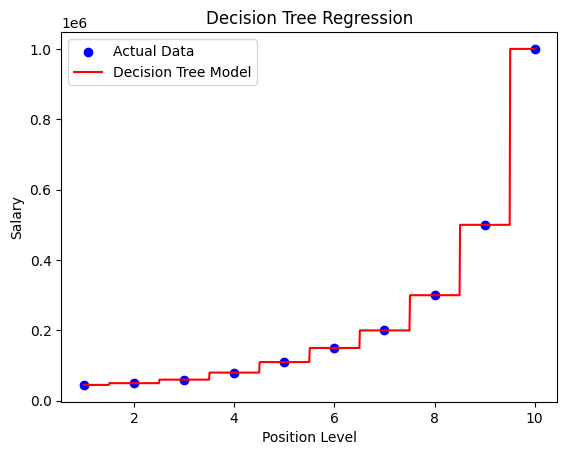

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../datasets/position-salaries.csv')

# Extract features and target variable
X = data.iloc[:, 1].values  # Feature: Level
y = data.iloc[:, 2].values  # Target: Salary

# We will apply decision tree regression
from sklearn.tree import DecisionTreeRegressor

# Reshape X to be a 2D array
# Why = X is a single feature, we need to reshape it for sklearn
X = X.reshape(-1, 1)
# Create and fit the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X, y)

# Predict a specific value
y_pred = regressor.predict([[6.5]])
print(f"Predicted salary for level 6.5: {y_pred[0]}")

# Visualize the Decision Tree Regression results with high resolution
X_grid = np.arange(X.min(), X.max(), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_grid, regressor.predict(X_grid), color='red', label='Decision Tree Model')
plt.title('Decision Tree Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()



### Classification
Goal: Use Decision Tree Classification to predict whether a user will purchase based on age and estimated salary.

Accuracy: 0.84
Recall: 0.78
Precision: 0.78


/var/folders/h4/xhg1t0s57lbczkp7p253ptww0000gn/T/ipykernel_51134/2988867884.py:57: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


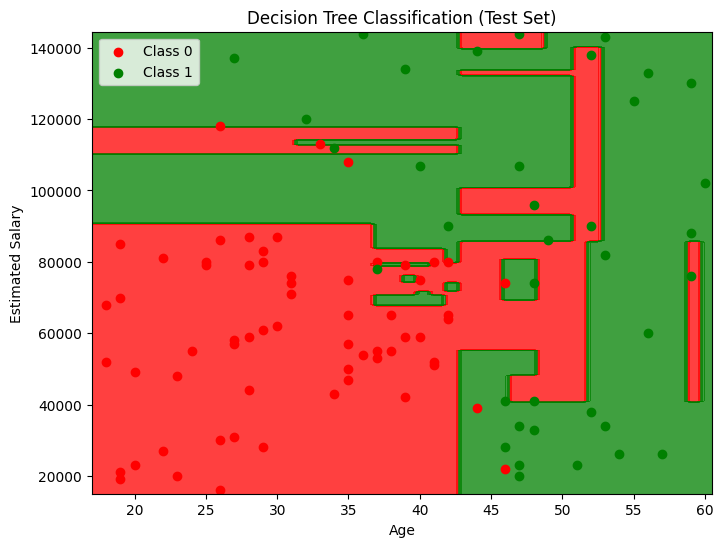

In [4]:
# Load the dataset
dataset = pd.read_csv('../datasets/social-network-ads.csv')

# split into features and target
X = dataset.iloc[:, :-1].values  # Features: Age, EstimatedSalary
y = dataset.iloc[:, -1].values  # Target: Purchased

# split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Decision trees dont require feature scaling

# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# print accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# recall means the percentage of actual positives that were correctly identified
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# precision means the percentage of predicted positives that were actually positive
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Visualize the Decision Tree Classification results
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Visualize the Decision Tree Classification results (fixed: avoid too fine meshgrid)


def plot_decision_boundary(X, y, model, title):
    X_set, y_set = X, y
    # Use a coarser step size to avoid memory issues
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.5),
        np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=500)
    )
    grid_points = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(grid_points).reshape(X1.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(
            X_set[y_set == j, 0], X_set[y_set == j, 1],
            c=ListedColormap(('red', 'green'))(i), label=f'Class {j}'
        )
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

# Test set decision boundary
plot_decision_boundary(X_test, y_test, classifier, "Decision Tree Classification (Test Set)")